In [2]:
def RGB2GRAY(image):
    height = len(image)
    width = len(image[0])
    grayscale = []
    for i in range(height):
        grayscale_row = []
        for j in range(width):
            R,G,B = image[i][j]
            gray = int(0.299*R + 0.589*G + 0.114*B)
            grayscale_row.append(gray)
        grayscale.append(grayscale_row)
    return grayscale

In [3]:
def Gray_hist(image):
    gray_image = RGB2GRAY(image)
    histogram = [0] * 256
    height = len(gray_image)
    width = len(gray_image[0])
    for i in range(height):
        for j in range(width):
            gray_value = gray_image[i][j]
            histogram[gray_value] += 1
    return histogram

In [4]:
def otsu_binarization(image):
    height = len(image)
    width = len(image[0])
    histogram = Gray_hist(image)
    total_pixels = height*width
    sum_total = 0
    for t in range(256):
        sum_total+=t*histogram[t]

    sumB = 0
    wB = 0
    maximum_between_class_variance = 0
    optimal_threshold = 0

    for t in range(256):
        wB += histogram[t]
        if wB == 0:
            continue
        wF = total_pixels - wB
        if wF == 0:
            break
        sumB += t*histogram[t]
        mB = sumB /wB
        mF = (sum_total-sumB)/ wF

        between_class_variance = wB * wF * (mB-mF)**2
        if between_class_variance > maximum_between_class_variance:
            maximum_between_class_variance = between_class_variance
            optimal_threshold = t

    return optimal_threshold

In [5]:
def binaryImage(image):
    optimal_threshold = otsu_binarization(image)
    binary_image = []
    gray_img = RGB2GRAY(image)
    print(optimal_threshold)
    for i in range(len(image)):
        binary_image_row=[]
        for j in range(len(image[0])):
            if gray_img[i][j] > optimal_threshold:
                binary_image_row.append(255)
            else:
                binary_image_row.append(0)
        binary_image.append(binary_image_row)
    return binary_image


In [12]:
converted_img = binaryImage(img)

154


In [7]:
import cv2
def read_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Error")
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_list = img_rgb.tolist()
    return img_list

In [8]:
path = "./test.png"
img = read_image(path)
hist = Gray_hist(img)

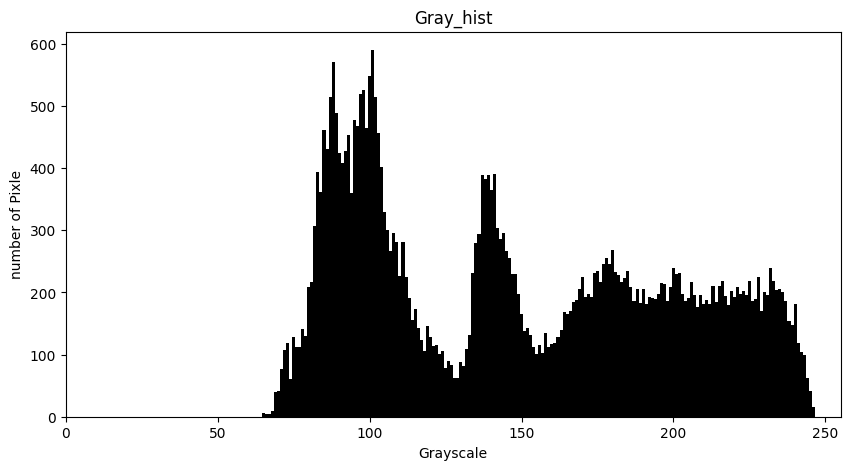

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  
plt.title('Gray_hist')  
plt.xlabel('Grayscale')  
plt.ylabel('number of Pixle')  
plt.bar(range(256), hist, color='black', width=1)  
plt.xlim([0, 255])  
plt.show()  

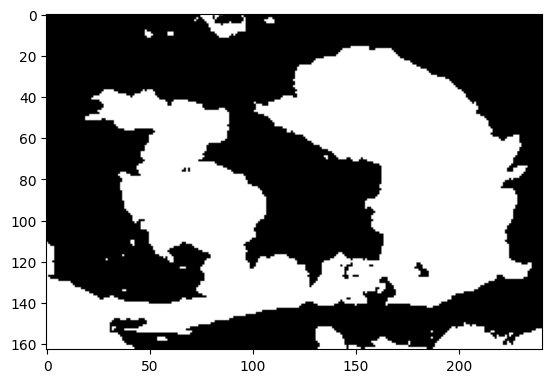

In [13]:
import numpy as np
bin_array = np.array(converted_img,dtype=np.uint8)
plt.imshow(bin_array,cmap='gray')  
plt.show()  

Test1:Тестирование алгоритма на изображении с четким контрастом между передним планом и фоном.

0


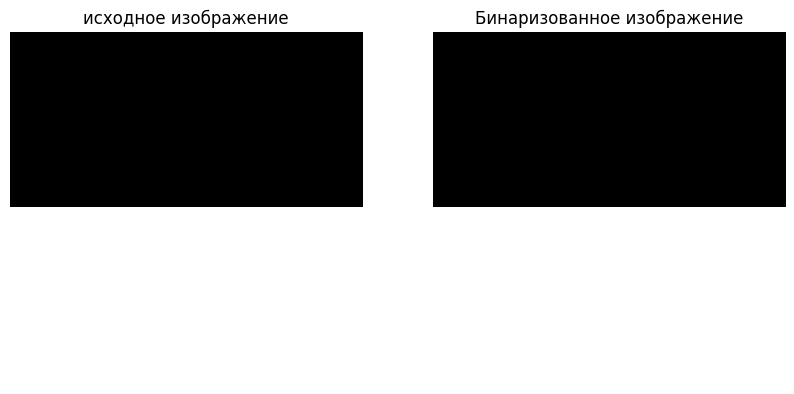

In [55]:
def test_high_contrast_image():
        # Создаем изображение с высоким контрастом
        height, width = 10, 10
        image = []
        for i in range(height):
            row = []
            for j in range(width):
                if i < height // 2:
                    pixel = [0, 0, 0]  # Черный пиксель
                else:
                    pixel = [255, 255, 255]  #  Белый пиксель
                row.append(pixel)
            image.append(row)

        # Применим метод Оцу
        binary_image = binaryImage(image)
       

        fig,axes = plt.subplots(1,2,figsize=(10,5))
        axes[0].imshow(image)  
        axes[0].set_title('исходное изображение')
        axes[0].axis('off')

        axes[1].imshow(binary_image,cmap='gray')
        axes[1].set_title('Бинаризованное изображение')
        axes[1].axis('off')
        plt.show()
test_high_contrast_image()


Test2:Тестирование алгоритма на изображениях с низкой контрастностью.

120


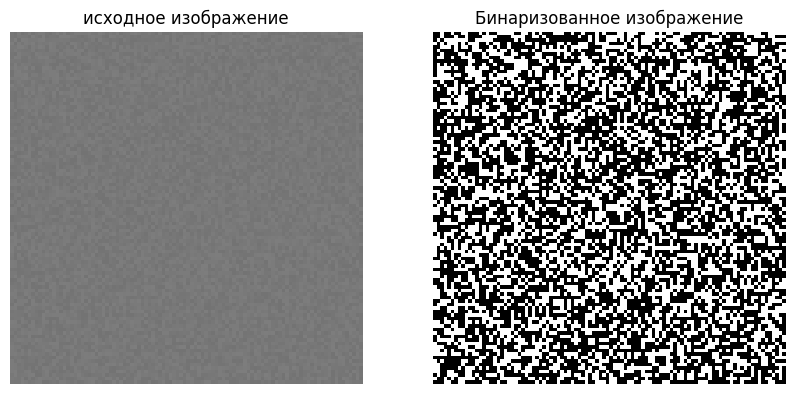

In [91]:
def test_low_contrast_image():
    height,width = 100,100
    image = []
    # Для создания изображения с пиксельными значениями в узком диапазоне серого
    for i in range(height):
        row = []
        for j in range(width):
            value = 120 + random.randint(-5,5) # Значения серого от 115 до 125
            pixel = [value,value,value]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
test_low_contrast_image()

Test3: Тестирование стабильности алгоритма на изображениях с случайным шумом и эффективности его вывода.

126


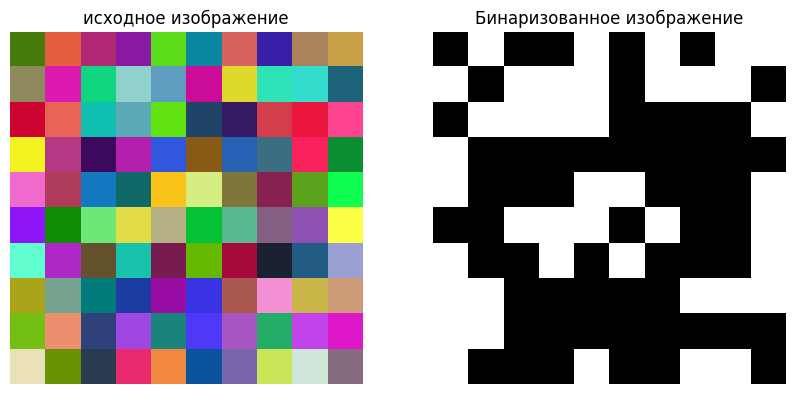

In [54]:
import random
def test_noisy_image():
    random.seed(22)

    height,width = 10,10
    image=[]
    for _ in range(height):
        row = []
        for _ in range(width):
            # Сгенерируем случайные значения RGB
            pixel = [random.randint(0,255) for _ in range(3)]
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
    plt.show()
test_noisy_image()

Test4: Тестирование алгоритма на пустом изображении, где все пиксели имеют одинаковый цвет.

0


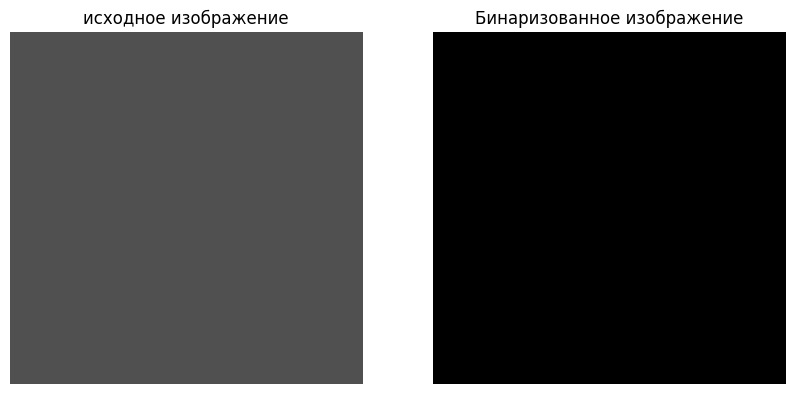

In [64]:
def test_blank_image():
    height, width = 10,10
    image = [[[80,80,80] for _ in range(width)] for _ in range(height)]

    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
    plt.show()
test_blank_image()

Test5:Тестирование работы алгоритма на изображениях с градиентом от чёрного к белому.

126


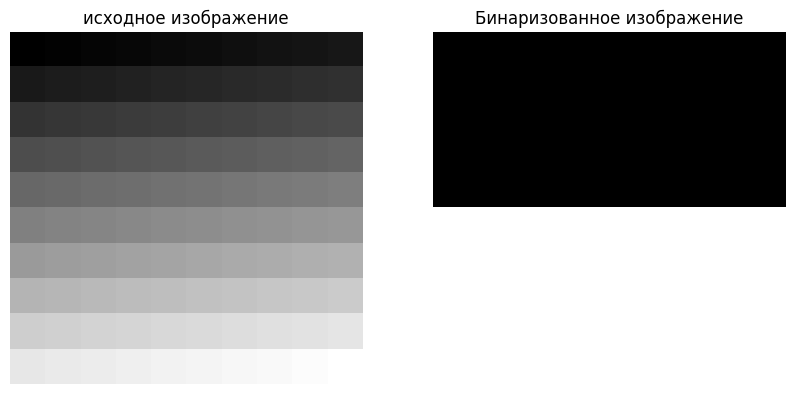

In [57]:
def test_gradient_image():
    height,width = 10, 10
    image = []
    for i in range(height):
        row = []
        for j in range(width):
            # Генерация градиентных значений от 0 до 255
            value = int((i * width + j) / (height*width-1) *255)
            pixel = [value,value,value]
            row.append(pixel)
        image.append(row)

    binary_image = binaryImage(image)


    
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
    plt.show()
test_gradient_image()
    

test6:Тестирование работы алгоритма на изображениях с несколькими областями разной степени серого.

50


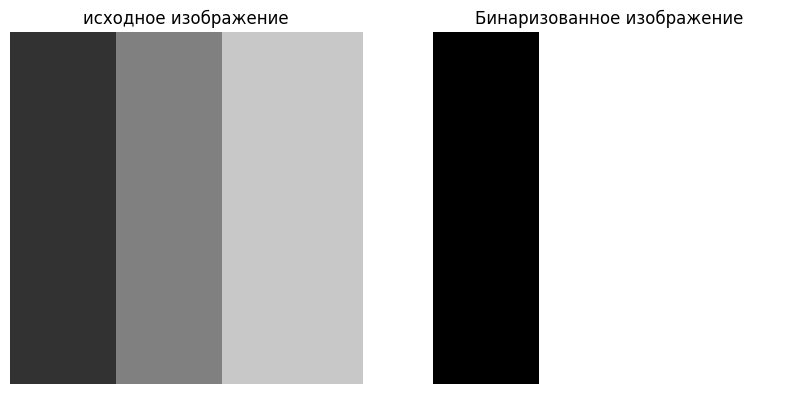

In [59]:
def test_multiple_thresholds_image():
    height,width = 10,10
    image=[]
    for i in range(height):
        row=[]
        for j in range(width):
            if j < width // 3:
                    pixel = [50, 50, 50]    #Тёмно-серый
            elif j < 2 * width // 3:
                    pixel = [128, 128, 128]  #Средне-серый
            else:
                    pixel = [200, 200, 200]  # Светло-серый
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)

    
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
    plt.show()
test_multiple_thresholds_image()

test7:Тестирование работы алгоритма на изображениях с шумом «соль и перец»(одна из форм шума, которая как правило встречается на графических и видео изображениях. Этот шум представляет собой случайно возникающие чёрные и белые пиксели.).

0


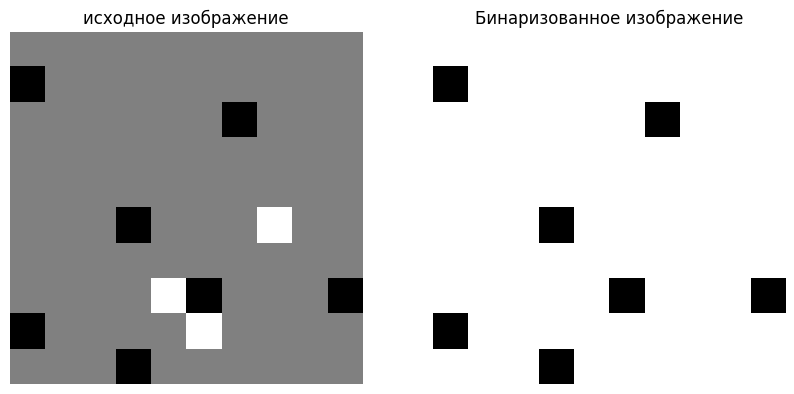

In [66]:
def test_salt_and_paper_noise():
    random.seed(12)
    height,width = 10,10
    #Базовое серое изображение
    image = [[[128,128,128] for _ in range(width)] for _ in range(height)]
    
    # Добавление шума «соль и перец»
    # 10% шумовых пикселей
    num_noisy_pixels = int(0.1*height*width)
    for _ in range(num_noisy_pixels):
        i = random.randint(0,height - 1)
        j = random.randint(0,width-1)
        if random.choice([True,False]):
            image[i][j] = [0,0,0] # Чёрный шум (перец)
        else:
            image[i][j] = [255,255,255] # Белый шум (соль)
        
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[0].axis('off')
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    ax[1].axis('off')
    plt.show()
test_salt_and_paper_noise()

Test8:Тестирование работы алгоритма на изображениях с шахматной доской.

0


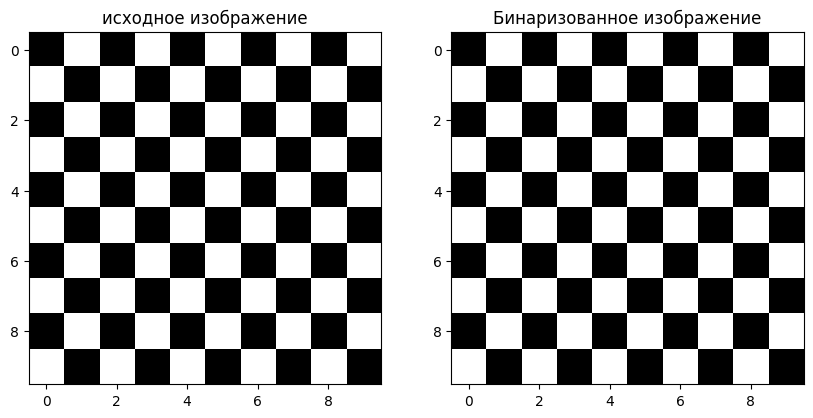

In [88]:
def test_checkerboard_pattern():
    height,width = 10,10
    image=[]

    for i in range(height):
        row = []
        for j in range(width):
            if(((i % 2 == 0) & (j % 2 == 0)) | (i % 2 != 0) & (j % 2 != 0)):
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_checkerboard_pattern()

Test9: Тестирование работы алгоритма на изображениях, имитирующих текст.

0


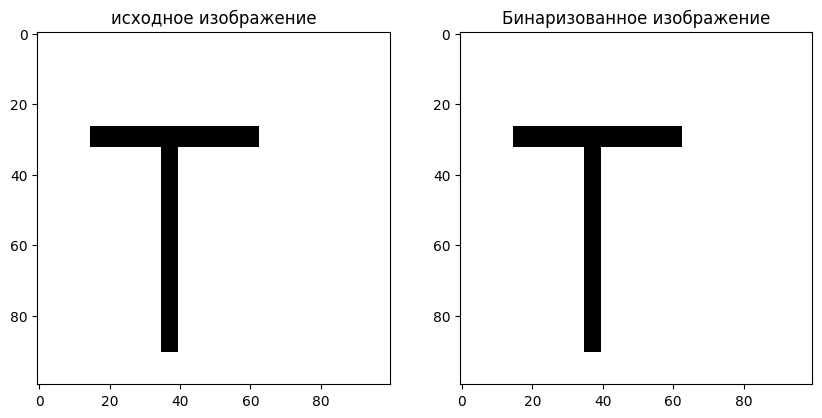

In [97]:
def test_image_with_text():
    height,width = 100,100
    image = []
    for i in range(height):
        row=[]
        for j in range(width):
            if (27<= i <= 32 and 15 <=j <=62) | (35 <=j <= 39 and 33<= i <= 90):
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_image_with_text()

Test10:Тестирование производительности и корректности алгоритма на больших изображениях.

0


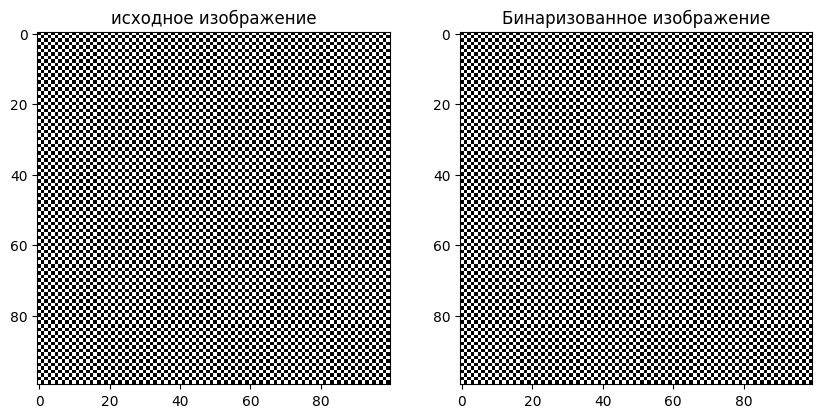

In [112]:
def test_large_image():
    height,width = 100,100
    image = []

    for i in range(height):
        row=[]
        for j in range(width):
            if(i+j) %2 == 0:
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)

    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_large_image()